In [1]:
# p.182 6.1.1 Breast Cancer Wisconsinデータセット
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                'breast-cancer-wisconsin/wdbc.data',
                header=None)

In [2]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [3]:
le.transform(['M', 'B'])

array([1, 0])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                   stratify=y, random_state=1)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# 連結する処理としてスケーリング、主成分分析、ロジスティック回帰を指定
pipe_lr = make_pipeline(StandardScaler(),
                       PCA(n_components=2),
                          LogisticRegression(random_state=1))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.956


/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

# 分割元データ、分割数、乱数生成機の状態を指定し、
# 層化k分割交差検証イテレータを表すStratifiedKFoldクラスのインスタンス化
kfold = StratifiedKFold(n_splits=10, random_state=1).split(X_train, y_train)
scores = []

# イテレータのインデックスと要素をループ処理：(上から順に)
#     データをモデルに適合
#     テストデータの正解率を算出
#     リストに正解率を追加
#     分割の番号、0以上の要素数、正解率を出力
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]), score))

# 正解率の平均と標準偏差を出力
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [256 153], Acc: 0.935
Fold:  2, Class dist.: [256 153], Acc: 0.935
Fold:  3, Class dist.: [256 153], Acc: 0.957
Fold:  4, Class dist.: [256 153], Acc: 0.957
Fold:  5, Class dist.: [256 153], Acc: 0.935
Fold:  6, Class dist.: [257 153], Acc: 0.956
Fold:  7, Class dist.: [257 153], Acc: 0.978
Fold:  8, Class dist.: [257 153], Acc: 0.933
Fold:  9, Class dist.: [257 153], Acc: 0.956
Fold: 10, Class dist.: [257 153], Acc: 0.956

CV accuracy: 0.950 +/- 0.014


/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/skl

In [7]:
from sklearn.model_selection import cross_val_score

# 交差検証のcross_val_score関数でモデルの正解率を算出
# 推定器 estimator, トレーニングデータX, 予測値y, 分割数cv, CPU数n_jobsを指定
scores = cross_val_score(estimator=pipe_lr,
                        X=X_train, y=y_train,
                        cv=10, n_jobs=1)
print('CV accuracy scores: %s' % scores)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV accuracy: 0.950 +/- 0.014


/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/skl

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(),
                       LogisticRegression(penalty='l2', random_state=1))
# learning_curve関数で交差検証による正解率を算出
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
        color='blue', marker='o',
        markersize=5, label='training accuracy')

# fill_between関数で平均±標準偏差の幅を塗りつぶす
# トレーニングデータのサイズtrain_sizes、透明度alpha、カラー'blue'を引数に指定
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/skl

/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/skl

<Figure size 640x480 with 1 Axes>

/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/skl

/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/skl

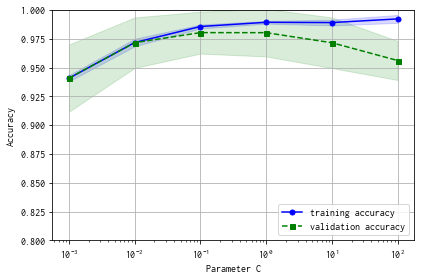

In [9]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# validation_curve関数によりモデルのパラメータを変化させ、
# 交差検証による正解率を算出
# clf__CはLogisticRegressionのオブジェクトのパラメータ
train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                            X=X_train,
                                            y=y_train,
                                            param_name='logisticregression__C',
                                            param_range=param_range,
                                            cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5,
        label='training accuracy')
plt.fill_between(param_range,
                train_mean + train_std,
                train_mean - train_std, alpha=0.15,
                color='blue')
plt.plot(param_range, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(param_range,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

In [10]:
# p.197 6.4.1 グリッドサーチを使ったハイパーパラメータのチューニング
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']},
             {'svc__C': param_range, 'svc__gamma': param_range,
             'svc__kernel': ['rbf']}]

# ハイパーパラメータ値のリストparam_gridを指定し、
# グリッドサーチを行うGridSearchCVクラスをインスタンス化
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=10,
                 n_jobs=-1)
gs = gs.fit(X_train, y_train)

# モデルの最良スコアを出力
print(gs.best_score_)

# 最良スコアとなるパラメータ値を出力
print(gs.best_params_)

0.9846153846153847
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [11]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.974


In [12]:
# p.199 6.4.2 入れ子式の交差検証によるアルゴリズムの選択
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.974 +/- 0.015


In [13]:
from sklearn.tree import DecisionTreeClassifier
# ハイパーパラメータ値として決定木の深さをパラメータ指定し、
# グリッドサーチを行うGridSearchCVクラスをインスタンス化
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                 param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                 scoring='accuracy',
                 cv=2)
scores = cross_val_score(gs,
                        X_train,
                        y_train,
                        scoring='accuracy',
                        cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.934 +/- 0.016


In [14]:
# p.201 6.5.1 混同行列を解釈する
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
# テストと予測のデータから混同行列を生成
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


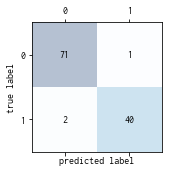

In [15]:
# 図のサイズを指定
fig, ax = plt.subplots(figsize=(2.5, 2.5))
# matshow関数で行列からヒートマップを描画
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)

for i in range(confmat.shape[0]): # クラス0の繰り返し処理
    for j in range(confmat.shape[1]): # クラス1の繰り返し処理
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center') # 件数を表示

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

In [16]:
# 適合率、再現率、F1スコアを出力
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print('precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))

print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))

print('F1 %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

precision: 0.976
Recall: 0.952
F1 0.964


In [17]:
# カスタムの性能指標を出力
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score, pos_label=0)
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring=scorer,
                 cv=10,
                 n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)

print(gs.best_params_)

0.9880219137963148
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


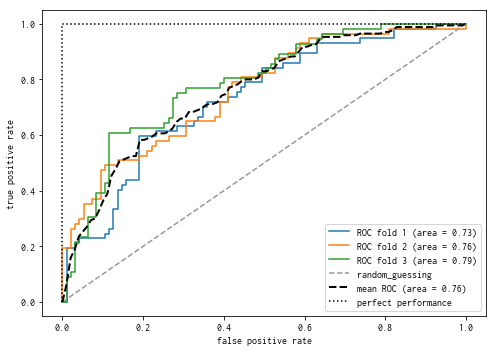

In [18]:
# p.205 6.5.3 ROC曲線をプロットする
from sklearn.metrics import roc_curve, auc
from scipy import interp
# スケーリング、主成分分析、ロジスティック回帰を指定して、
# Pipelineクラスをインスタンス化
pipt_lr = make_pipeline(StandardScaler(),
                       PCA(n_components=2),
                       LogisticRegression(penalty='l2', random_state=1, C=100.0))

# 2つの特徴量を抽出
X_train2 = X_train[:, [4, 14]]

# 層化k分割交差検証イテレータを表すStratifiedKFoldクラスをインスタンス化
cv = list(StratifiedKFold(n_splits=3, random_state=1).split(X_train, y_train))
fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0

# 0から1までの間で100個の要素を生成
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    # predict_probaメソッドで確率を予測、fitメソッドでモデルに適合させる
    probas = pipe_lr.fit(X_train2[train],
                        y_train[train]).predict_proba(X_train2[test])
    
    # roc_curve関数でROC曲線の性能を計算してプロット
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:, 1], pos_label=1)
    
    mean_tpr += interp(mean_fpr, fpr, tpr) # FPR(X軸)とTPR(Y軸)を線形補間
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
    
# 当て推量をプロット
plt.plot([0, 1],
        [0, 1],
        linestyle='--',
        color=(0.6, 0.6, 0.6),
        label='random_guessing')

# FPR, TPR, RPC AUCそれぞれの平均を計算してプロット
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
        label='mean ROC (area = %0.2f)' % mean_auc, lw=2)

# 完全に予測が正解したときのROC曲線をプロット
plt.plot([0, 0, 1],
        [0, 1, 1],
        linestyle=':',
        color='black',
        label='perfect performance')

# グラフの各項目を指定
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [19]:
pre_scorer = make_scorer(score_func=precision_score,
                        pos_label=1,
                        greater_is_better=True,
                        average='micro')

X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))

y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb) * 100

89.92443324937027

In [20]:
from sklearn.utils import resample
print('Number of class 1 samples before:', X_imb[y_imb == 1].shape[0])

# サンプルの個数が暮らす0と同じになるまで新しいサンプルを復元抽出
X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
                                   y_imb[y_imb == 1],
                                   replace=True,
                                   n_samples=X_imb[y_imb == 0].shape[0],
                                   random_state=123)
print('Number of class 1 samples after:', X_upsampled.shape[0])

X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

Number of class 1 samples before: 40
Number of class 1 samples after: 357


50.0